In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

Mounted at /content/drive


Files in TrainA:
['ct1.png', 'ct1001.png', 'ct1002.png', 'ct1003.png', 'ct1004.png', 'ct1005.png', 'ct1006.png', 'ct1007.png', 'ct101.png', 'ct1011.png', 'ct1012.png', 'ct1013.png', 'ct1014.png', 'ct1015.png', 'ct1016.png', 'ct1017.png', 'ct102.png', 'ct1021.png', 'ct1022.png', 'ct1023.png', 'ct1024.png', 'ct1025.png', 'ct1026.png', 'ct1027.png', 'ct103.png', 'ct1031.png', 'ct1032.png', 'ct1033.png', 'ct1034.png', 'ct1035.png', 'ct1036.png', 'ct1037.png', 'ct104.png', 'ct1041.png', 'ct1042.png', 'ct1043.png', 'ct1044.png', 'ct1045.png', 'ct1046.png', 'ct1047.png', 'ct105.png', 'ct1051.png', 'ct1052.png', 'ct1053.png', 'ct1054.png', 'ct1055.png', 'ct1056.png', 'ct1057.png', 'ct106.png', 'ct1061.png', 'ct1062.png', 'ct1063.png', 'ct1064.png', 'ct1065.png', 'ct1066.png', 'ct1067.png', 'ct107.png', 'ct1071.png', 'ct1072.png', 'ct1073.png', 'ct1074.png', 'ct1075.png', 'ct1076.png', 'ct1077.png', 'ct1081.png', 'ct1082.png', 'ct1083.png', 'ct1084.png', 'ct1085.png', 'ct1086.png', 'ct1087.png'

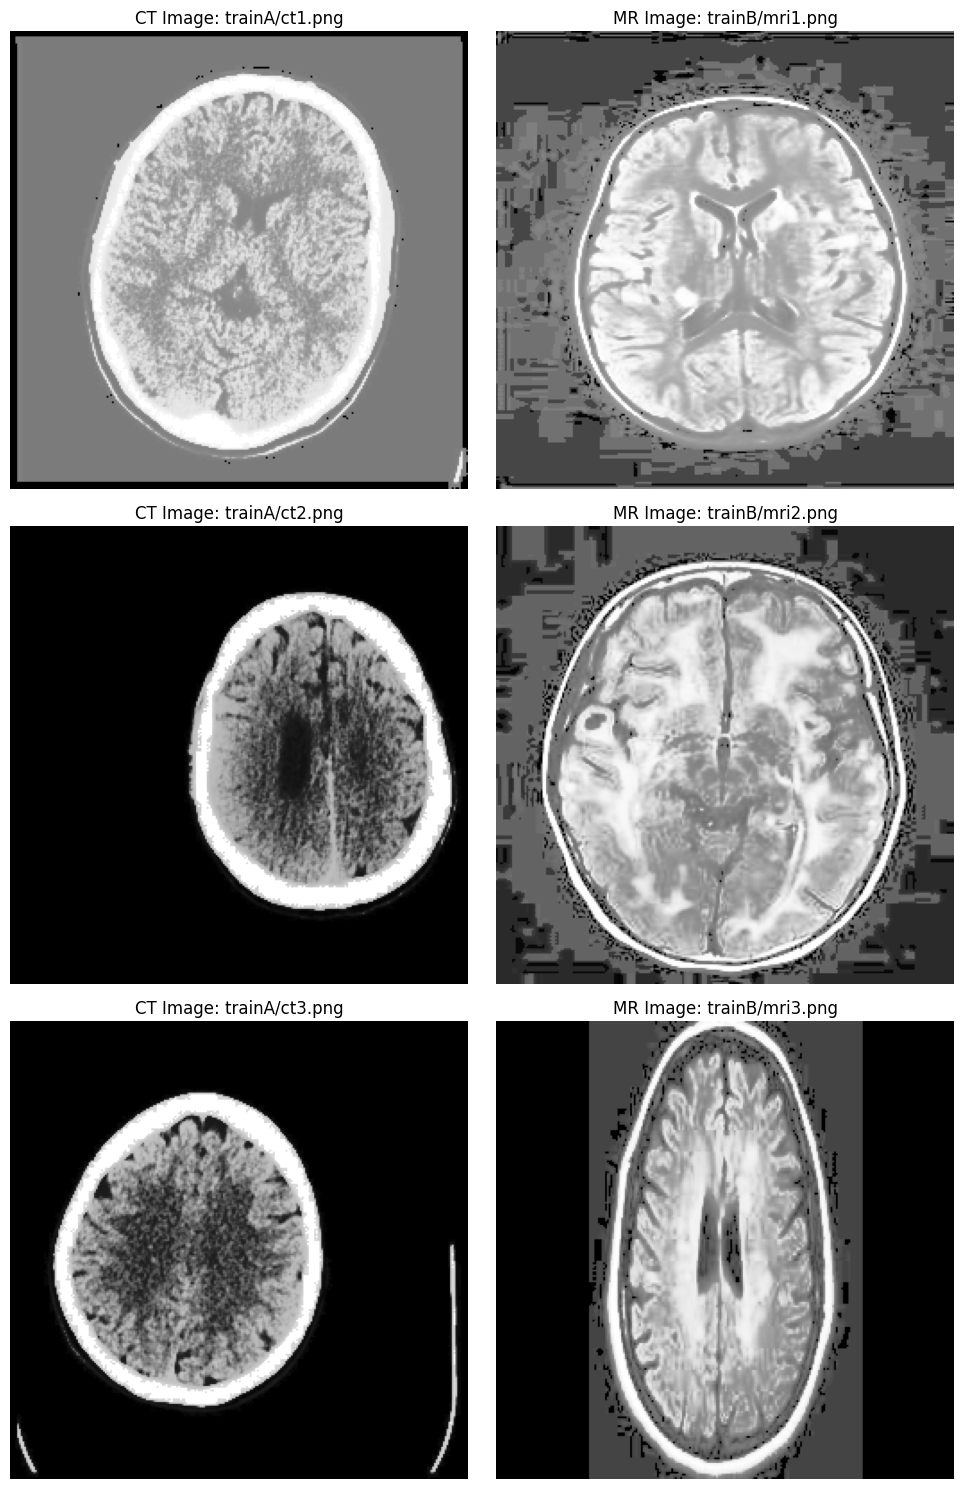

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import re

# Define paths to the folders
base_path = "/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images"
trainA_path = os.path.join(base_path, "trainA")
trainB_path = os.path.join(base_path, "trainB")

# Function to get sorted list of files in a directory
def get_sorted_files(directory):
    return sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Function to extract number from filename
def extract_number(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else None

# Get list of files in TrainA and TrainB
trainA_files = get_sorted_files(trainA_path)
trainB_files = get_sorted_files(trainB_path)

# Print out the files to debug
print("Files in TrainA:")
print(trainA_files)
print("Files in TrainB:")
print(trainB_files)

# Create a dictionary to map file numbers to filenames
trainA_dict = {extract_number(f): f for f in trainA_files}
trainB_dict = {extract_number(f): f for f in trainB_files}

# Find common numbers in both TrainA and TrainB
common_numbers = set(trainA_dict.keys()).intersection(set(trainB_dict.keys()))

# Print out the common numbers to debug
print("Common numbers:")
print(common_numbers)

# Create a list to hold the mapping information
mapping = [(trainA_dict[num], trainB_dict[num]) for num in common_numbers]

# Convert the mapping to a DataFrame
mapping_df = pd.DataFrame(mapping, columns=['CT Image', 'MR Image'])

# Prepend the paths to the image filenames
mapping_df['CT Image'] = mapping_df['CT Image'].apply(lambda x: os.path.join("trainA", x))
mapping_df['MR Image'] = mapping_df['MR Image'].apply(lambda x: os.path.join("trainB", x))

# Save the DataFrame to a CSV file
mapping_csv_path = os.path.join(base_path, "ct_mr_mapping.csv")
mapping_df.to_csv(mapping_csv_path, index=False)

print(f"Mapping saved to {mapping_csv_path}")

# Function to display an image
def show_image(image_path, title):
    full_path = os.path.join(base_path, image_path)
    image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    else:
        print(f"Could not read image at {full_path}")

# Display the mapped images
num_pairs_to_display = 3  # Adjust the number of pairs to display as needed
plt.figure(figsize=(10, num_pairs_to_display * 5))

for i in range(num_pairs_to_display):
    if i >= len(mapping_df):
        break
    ct_image_path = mapping_df.iloc[i]['CT Image']
    mr_image_path = mapping_df.iloc[i]['MR Image']

    plt.subplot(num_pairs_to_display, 2, 2*i + 1)
    show_image(ct_image_path, f"CT Image: {mapping_df.iloc[i]['CT Image']}")

    plt.subplot(num_pairs_to_display, 2, 2*i + 2)
    show_image(mr_image_path, f"MR Image: {mapping_df.iloc[i]['MR Image']}")

plt.tight_layout()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.0 MB/s eta 0:00:00
Files in /content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/MR/image_MR: ['10_MR_s1.dcm', '10_MR_s2.dcm', '10_MR_s2_augmented.dcm', '10_MR_s3.dcm', '10_MR_s3_augmented.dcm']
Files in /content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/CT/image_CT: ['10_CT_s1.dcm', '10_CT_s2.dcm', '10_CT_s2_augmented.dcm', '10_CT_s3.dcm', '10_CT_s3_augmented.dcm']
MR Dictionary: [(('10', '1'), '10_MR_s1.dcm'), (('10', '2'), '10_MR_s2.dcm'), (('10', '3'), '10_MR_s3.dcm'), (('10', '4'), '10_MR_s4.dcm'), (('10', '5'), '10_MR_s5.dcm')]
CT Dictionary: [(('10', '1'), '10_CT_s1.dcm'), (('10', '2'), '10_CT_s2.dcm'), (('10', '3'), '10_CT_s3.dcm'), (('10', '4'), '10_CT_s4.dcm'), (('10', '5'), '10_CT_s5.dcm')]
Common keys found: [('14', '2'), ('3', '1'), ('15', '2'), ('17', '3'), ('9', '1')]
Mapping saved to /content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-

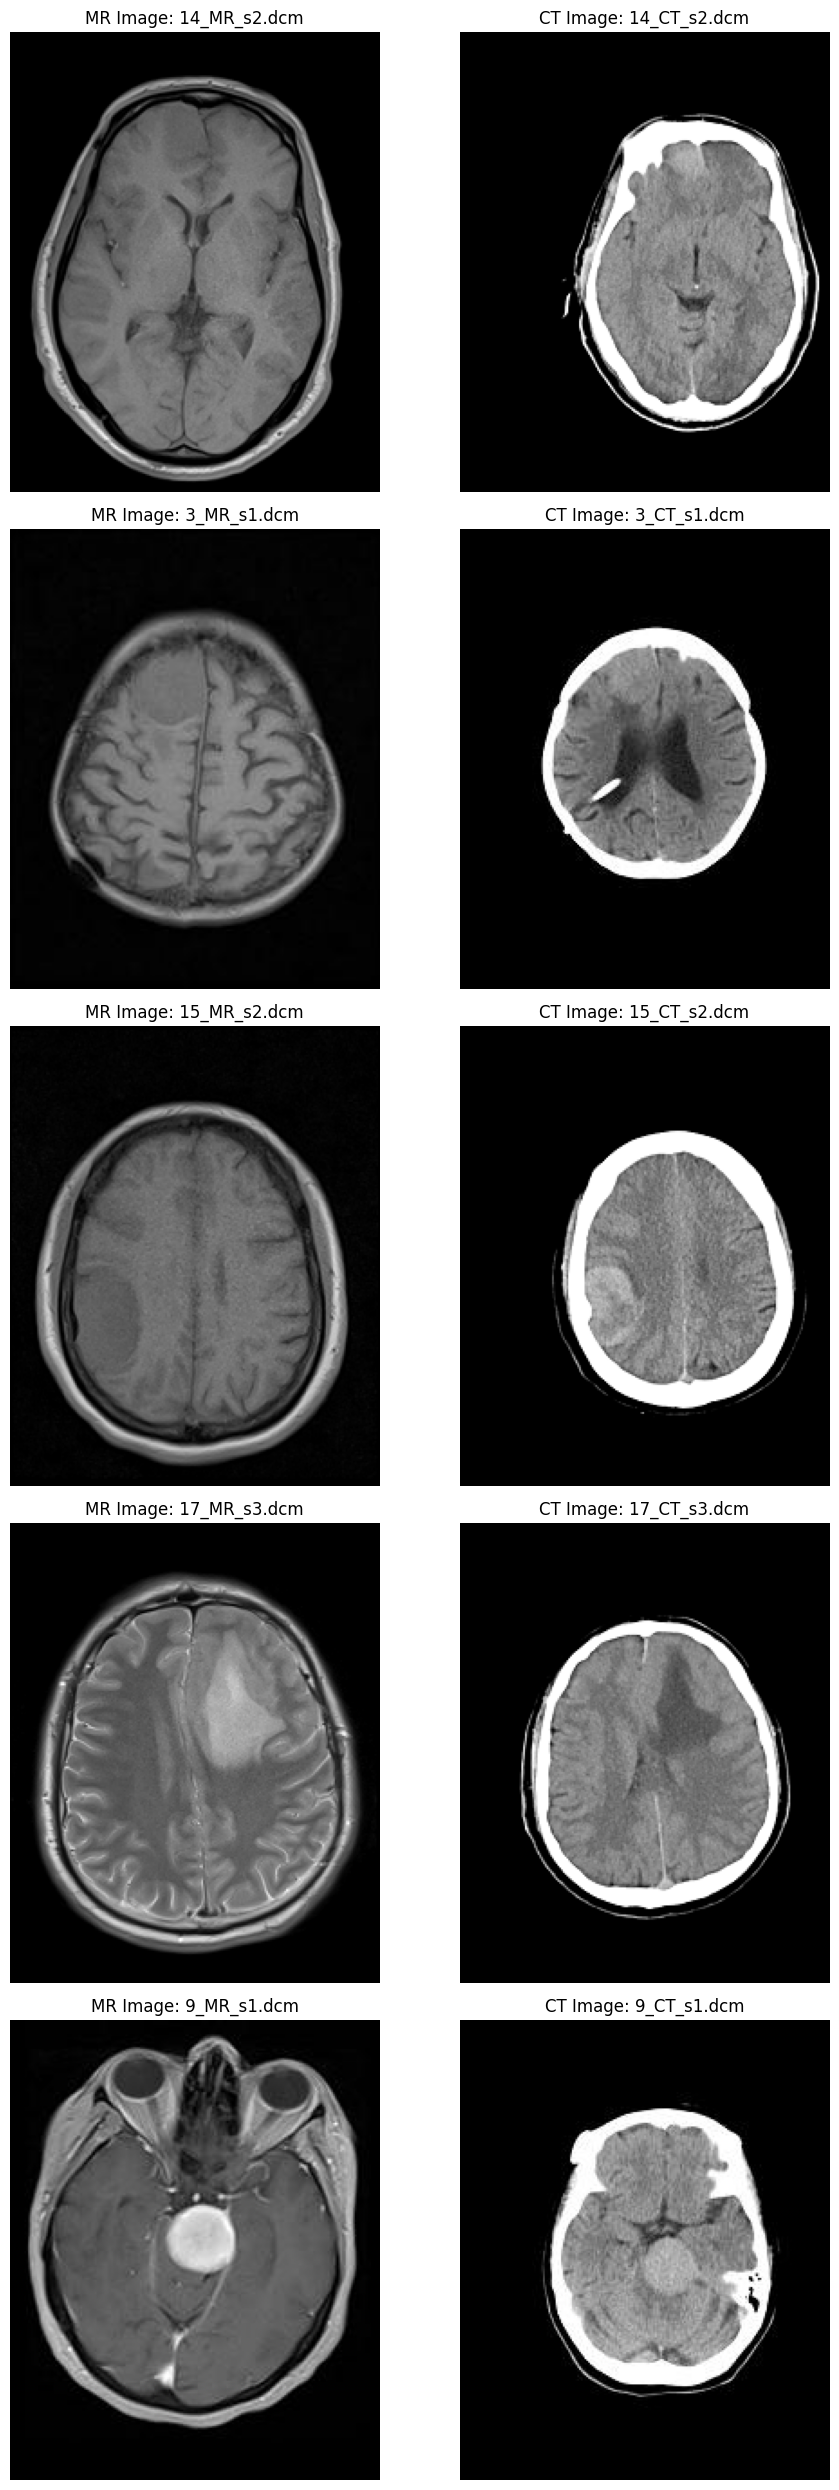

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
!pip install pydicom
import pydicom
import re

# Define the base path to your dataset
base_path = '/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset'

# Define paths to the MR and CT image directories
mr_image_path = os.path.join(base_path, 'MR/image_MR')
ct_image_path = os.path.join(base_path, 'CT/image_CT')

# Function to get sorted list of files in a directory
def get_sorted_files(directory):
    files = sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
    print(f"Files in {directory}: {files[:5]}")  # Print first 5 files to check
    return files

# Function to extract identifier and serial from filename
def extract_identifier_and_serial(filename, modality):
    match = re.match(r'(\d+)_{}_s(\d+).dcm'.format(modality), filename)
    return (match.group(1), match.group(2)) if match else None

# Get list of MR and CT files
mr_files = get_sorted_files(mr_image_path)
ct_files = get_sorted_files(ct_image_path)

# Create dictionaries to map (identifier, serial) to filenames
mr_dict = {extract_identifier_and_serial(f, 'MR'): f for f in mr_files if extract_identifier_and_serial(f, 'MR')}
ct_dict = {extract_identifier_and_serial(f, 'CT'): f for f in ct_files if extract_identifier_and_serial(f, 'CT')}

# Debug: Print the dictionaries to ensure correct extraction
print(f"MR Dictionary: {list(mr_dict.items())[:5]}")
print(f"CT Dictionary: {list(ct_dict.items())[:5]}")

# Find common identifiers and serials in both MR and CT
common_keys = set(mr_dict.keys()).intersection(set(ct_dict.keys()))
print(f"Common keys found: {list(common_keys)[:5]}")  # Print first 5 common keys

# Create a list to hold the mapping information with complete paths
mapping = [(os.path.join(mr_image_path, mr_dict[key]), os.path.join(ct_image_path, ct_dict[key])) for key in common_keys]

# Convert the mappings to a DataFrame
mapping_df = pd.DataFrame(mapping, columns=['MR Image', 'CT Image'])

# Save the DataFrame to a CSV file
output_csv_path = os.path.join(base_path, 'mr_ct_mapping.csv')
mapping_df.to_csv(output_csv_path, index=False)
print(f"Mapping saved to {output_csv_path}")

# Function to display a DICOM image
def show_dicom_image(image_path, title):
    try:
        ds = pydicom.dcmread(image_path)
        if ds.PixelData:
            image = ds.pixel_array
            plt.imshow(image, cmap='gray')
            plt.title(title)
            plt.axis('off')
    except Exception as e:
        print(f"Could not read {image_path}: {e}")

# Display the mapped images for a sample of the dataset
num_pairs_to_display = min(5, len(mapping))  # Adjust the number of pairs to display as needed
plt.figure(figsize=(10, num_pairs_to_display * 5))

for i, (mr_file, ct_file) in enumerate(mapping[:num_pairs_to_display]):
    plt.subplot(num_pairs_to_display, 2, 2*i + 1)
    show_dicom_image(mr_file, f"MR Image: {os.path.basename(mr_file)}")

    plt.subplot(num_pairs_to_display, 2, 2*i + 2)
    show_dicom_image(ct_file, f"CT Image: {os.path.basename(ct_file)}")

plt.tight_layout()
plt.show()

Train input shape: (570, 256, 256)
Train output shape: (570, 256, 256)
Test input shape: (150, 256, 256)
Test output shape: (150, 256, 256)
Validation input shape: (90, 256, 256)
Validation output shape: (90, 256, 256)


CT Image              MR Image
0      CT/ct_image_0.png    MR/mri_image_0.png
1      CT/ct_image_1.png    MR/mri_image_1.png
2      CT/ct_image_2.png    MR/mri_image_2.png
3      CT/ct_image_3.png    MR/mri_image_3.png
4      CT/ct_image_4.png    MR/mri_image_4.png
..                   ...                   ...
238  CT/ct_image_238.png  MR/mri_image_238.png
239  CT/ct_image_239.png  MR/mri_image_239.png
240  CT/ct_image_240.png  MR/mri_image_240.png
241  CT/ct_image_241.png  MR/mri_image_241.png
242  CT/ct_image_242.png  MR/mri_image_242.png

[243 rows x 2 columns]

Data saved to /content/processed_dicom_data.csv


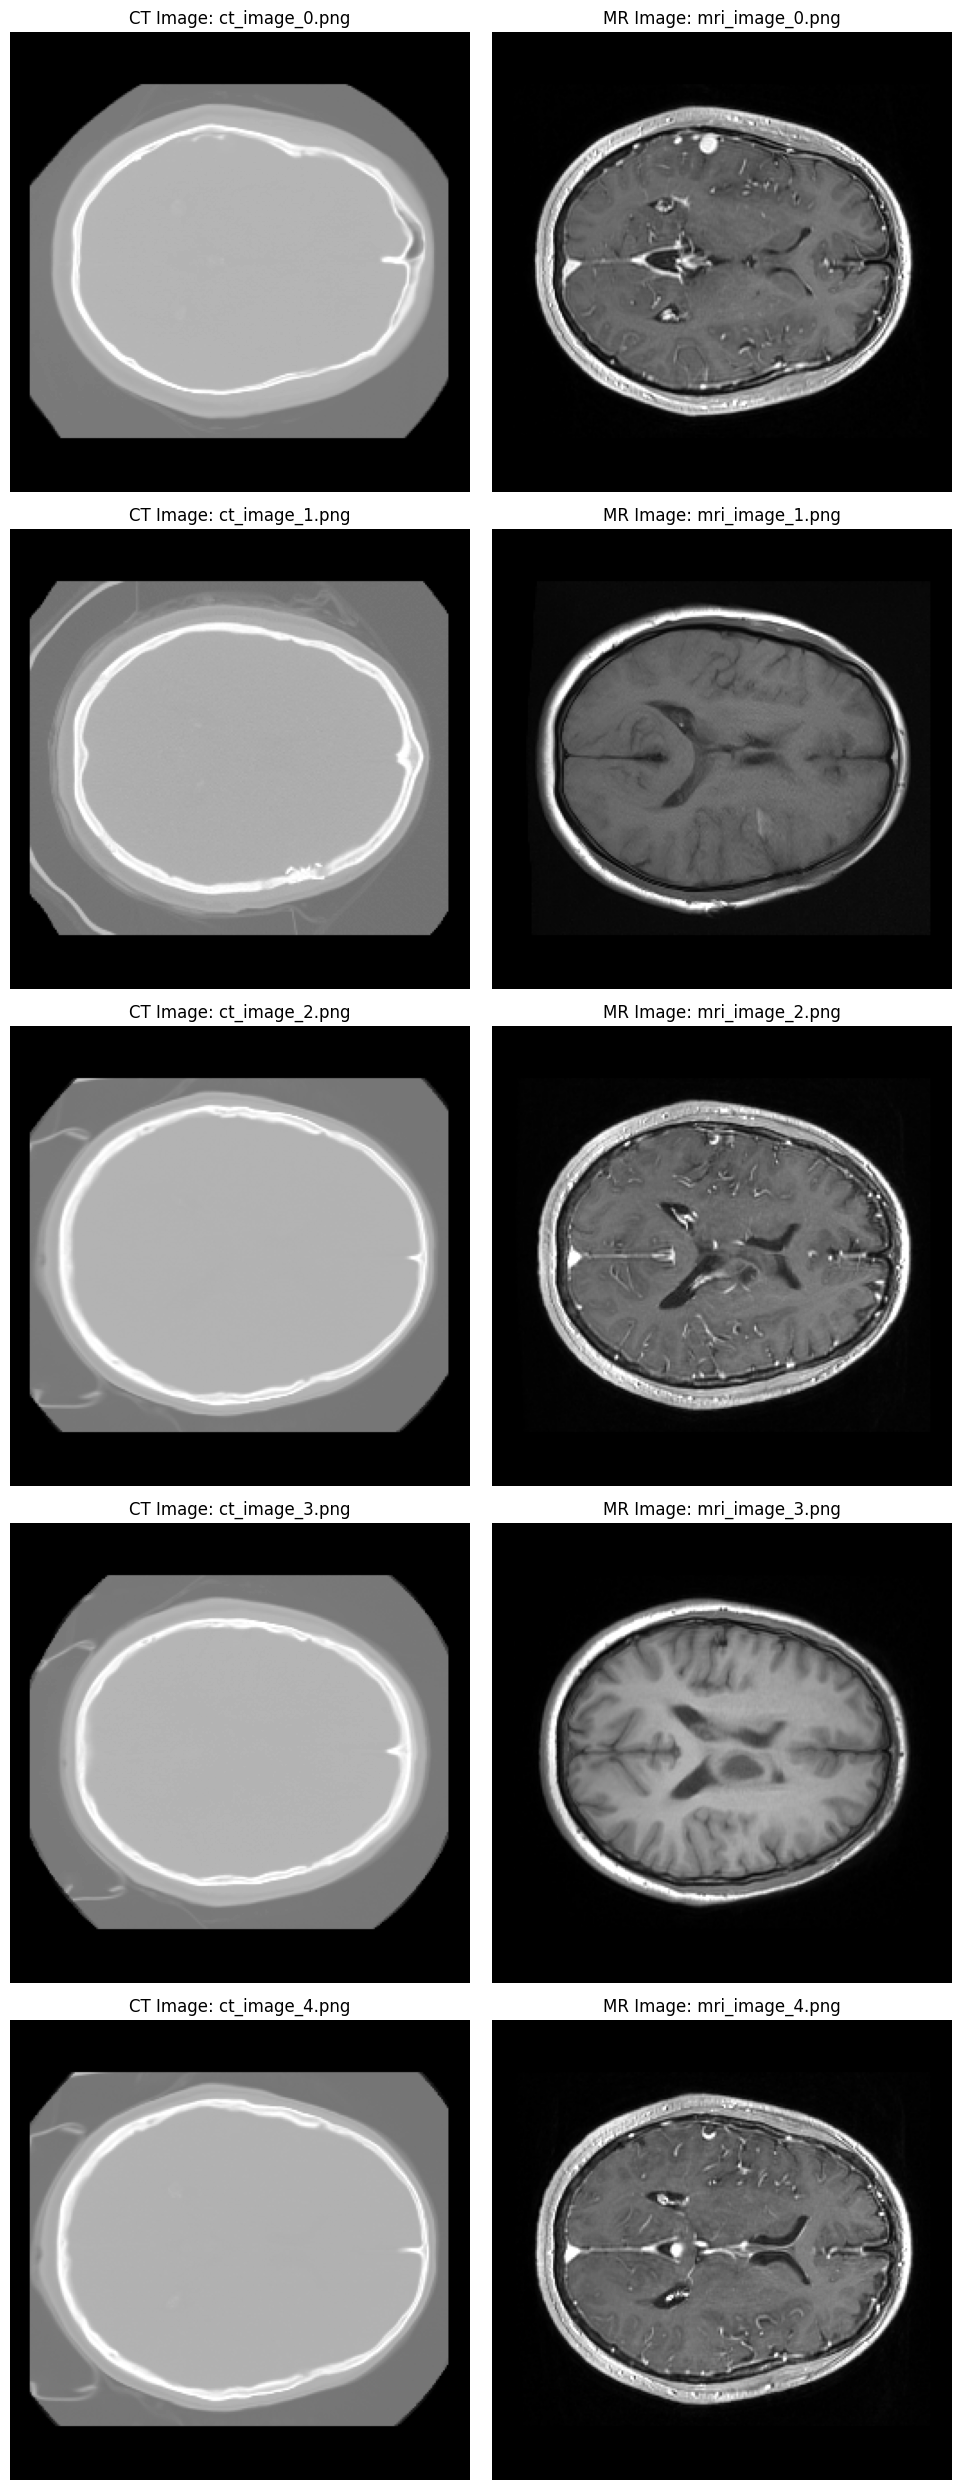

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2

# Define paths to your dataset
path_to_train_input = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/train_input.npy'
path_to_train_output = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/train_output.npy'
path_to_test_input = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/test_input.npy'
path_to_test_output = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/test_output.npy'
path_to_val_input = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/val_input.npy'
path_to_val_output = '/content/drive/MyDrive/Mini Project/CT AND MRI/data(processed)/val_output.npy'

# Load the data from .npy files
train_input = np.load(path_to_train_input)
train_output = np.load(path_to_train_output)
test_input = np.load(path_to_test_input)
test_output = np.load(path_to_test_output)
val_input = np.load(path_to_val_input)
val_output = np.load(path_to_val_output)

# Print shapes to confirm data is loaded correctly
print("Train input shape:", train_input.shape)
print("Train output shape:", train_output.shape)
print("Test input shape:", test_input.shape)
print("Test output shape:", test_output.shape)
print("Validation input shape:", val_input.shape)
print("Validation output shape:", val_output.shape)

# Combine the datasets for sampling
combined_input = np.concatenate((train_input, test_input, val_input))
combined_output = np.concatenate((train_output, test_output, val_output))

# Determine the number of samples to select (30% of the total data)
num_samples = int(0.3 * len(combined_input))

# Randomly select indices for sampling
selected_indices = random.sample(range(len(combined_input)), num_samples)

# Create directories to save the images
os.makedirs('/content/temp/CT', exist_ok=True)
os.makedirs('/content/temp/MR', exist_ok=True)

# Save the sampled MRI and CT images as files and create a DataFrame
sampled_mri_images = []
sampled_ct_images = []

for i, index in enumerate(selected_indices):
    mri_image = combined_input[index]
    ct_image = combined_output[index]

    mri_image_path = f"/content/temp/MR/mri_image_{i}.png"
    ct_image_path = f"/content/temp/CT/ct_image_{i}.png"

    cv2.imwrite(mri_image_path, (mri_image * 255).astype(np.uint8))  # Scale the image to 0-255 and convert to uint8
    cv2.imwrite(ct_image_path, (ct_image * 255).astype(np.uint8))    # Scale the image to 0-255 and convert to uint8

    sampled_mri_images.append(f"MR/mri_image_{i}.png")
    sampled_ct_images.append(f"CT/ct_image_{i}.png")

# Create DataFrame for the sampled dataset
df3 = pd.DataFrame({
    'CT Image': sampled_ct_images,
    'MR Image': sampled_mri_images
})

# Display the DataFrame using pandas' built-in functionality
from IPython.display import display
display(df3)

# Save the DataFrame to a CSV file if needed
output_csv_path = '/content/processed_dicom_data.csv'
df3.to_csv(output_csv_path, index=False)
print(f"Data saved to {output_csv_path}")

# Function to display an image using OpenCV
def show_image(image_path, title):
    full_path = f"/content/temp/{image_path}"
    image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    else:
        print(f"Could not read image at {full_path}")

# Display some sample pairs of images
num_pairs_to_display = 5  # Adjust the number of pairs to display as needed
plt.figure(figsize=(10, num_pairs_to_display * 5))

for i in range(num_pairs_to_display):
    if i >= len(df3):
        break
    ct_image_path = df3.iloc[i]['CT Image']
    mr_image_path = df3.iloc[i]['MR Image']

    plt.subplot(num_pairs_to_display, 2, 2*i + 1)
    show_image(ct_image_path, f"CT Image: {os.path.basename(ct_image_path)}")

    plt.subplot(num_pairs_to_display, 2, 2*i + 2)
    show_image(mr_image_path, f"MR Image: {os.path.basename(mr_image_path)}")

plt.tight_layout()
plt.show()


#Combined Dataset

Combined DataFrame saved to /content/combined_ct_mr_mapping.csv


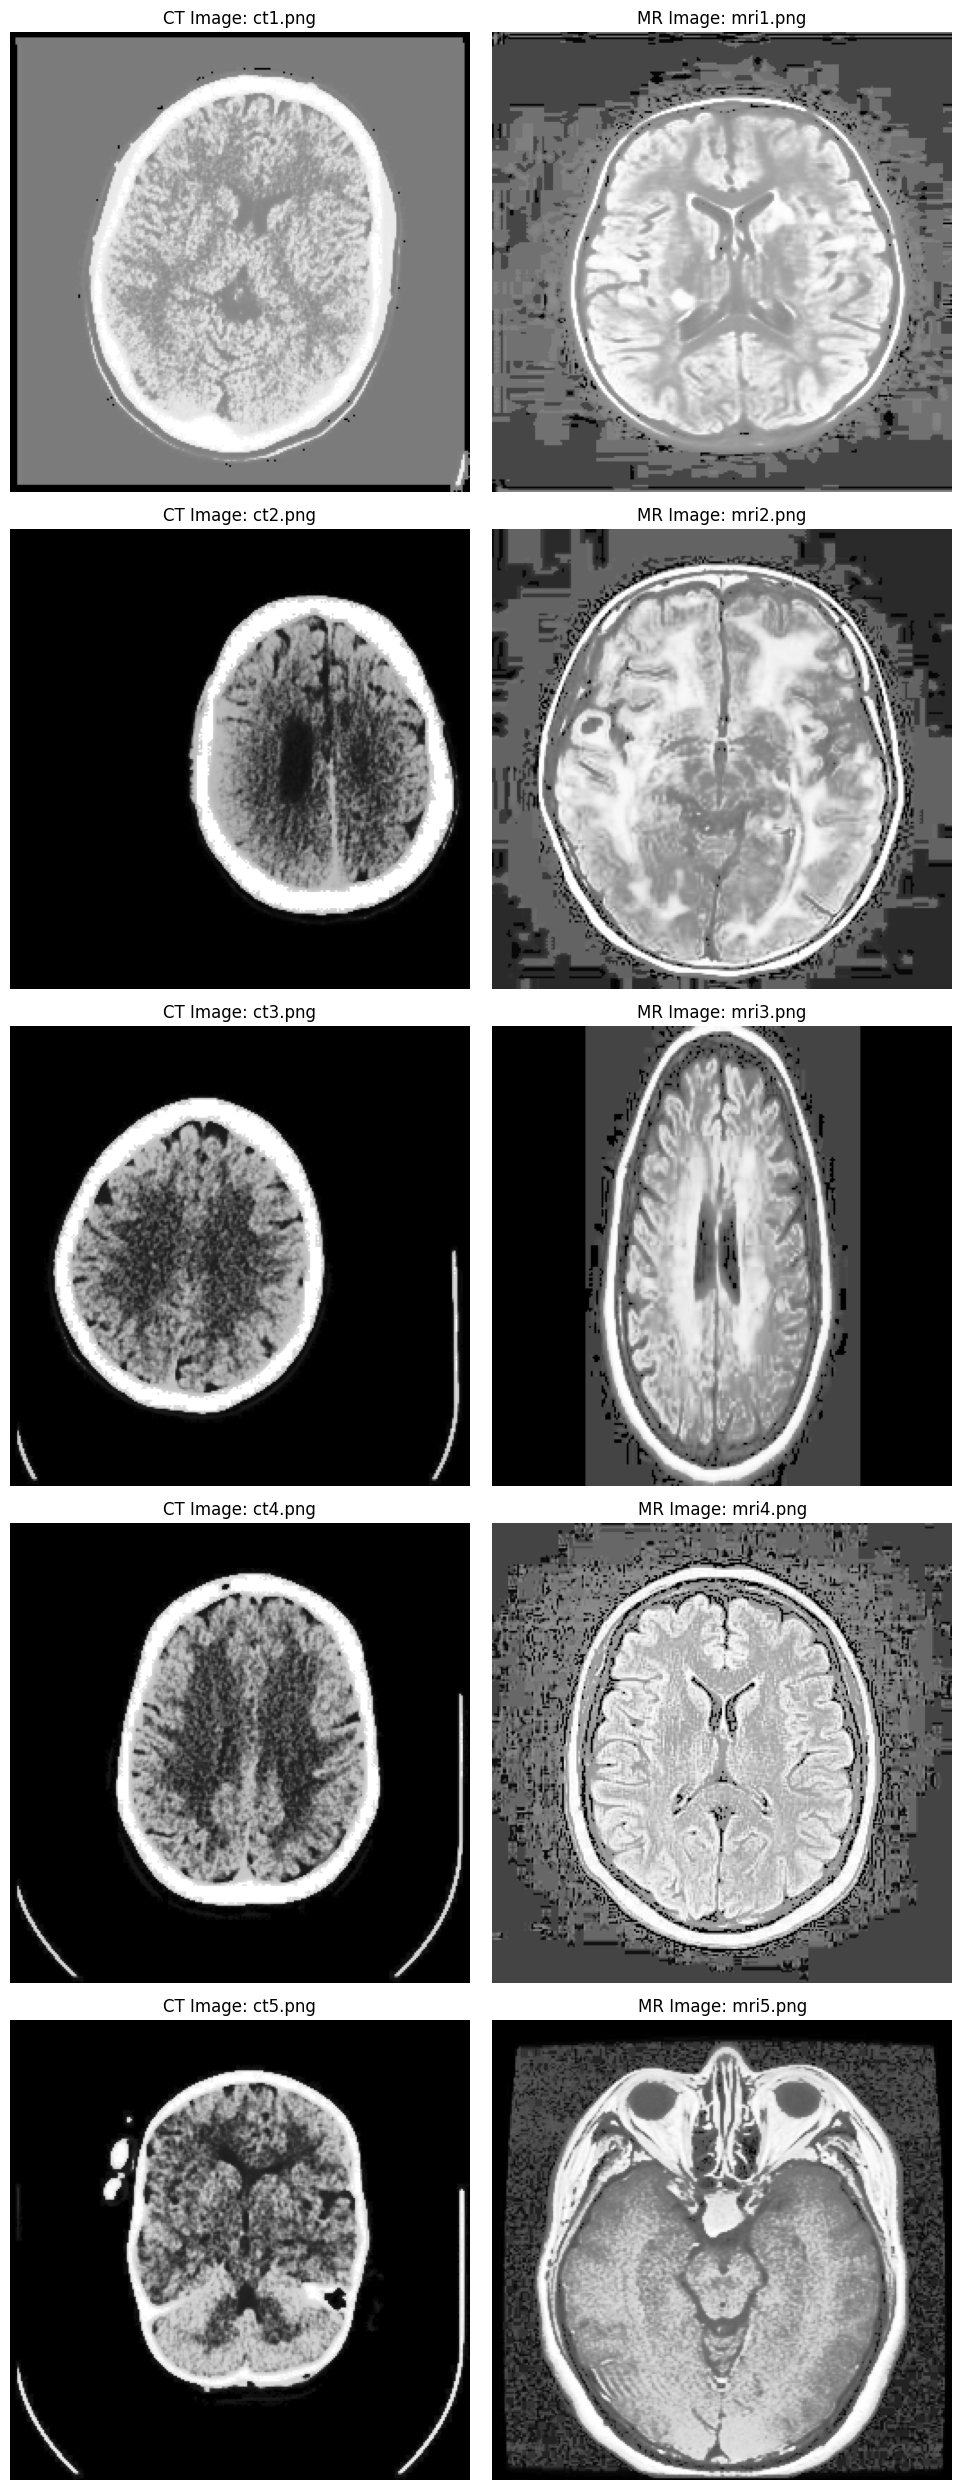

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import re

# Paths to the base directories
base_path1 = "/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images"
base_path2 = "/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset"
base_path3 = "/content/temp"

# Function to prepend base paths to the file names in the dataframes
def prepend_base_path(df, base_path, ct_col='CT Image', mr_col='MR Image'):
    df[ct_col] = df[ct_col].apply(lambda x: os.path.join(base_path, x))
    df[mr_col] = df[mr_col].apply(lambda x: os.path.join(base_path, x))
    return df

# Load the three DataFrames
df1_path = "/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images/ct_mr_mapping.csv"
df2_path = "/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/mr_ct_mapping.csv"
df3_path = "/content/processed_dicom_data.csv"

df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)
df3 = pd.read_csv(df3_path)

# Ensure the paths in each dataframe are consistent
df1 = prepend_base_path(df1, base_path1)
df2.columns = ['MR Image', 'CT Image']
df2 = prepend_base_path(df2[['CT Image', 'MR Image']], base_path2)
df3 = prepend_base_path(df3, base_path3)

# Concatenate the DataFrames
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_csv_path = "/content/combined_ct_mr_mapping.csv"
combined_df.to_csv(combined_csv_path, index=False)
print(f"Combined DataFrame saved to {combined_csv_path}")

# Function to display an image using OpenCV
def show_image(image_path, title):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    else:
        print(f"Could not read image at {image_path}")

# Display some sample pairs of images
num_pairs_to_display = 5  # Adjust the number of pairs to display as needed
plt.figure(figsize=(10, num_pairs_to_display * 5))

for i in range(num_pairs_to_display):
    if i >= len(combined_df):
        break
    ct_image_path = combined_df.iloc[i]['CT Image']
    mr_image_path = combined_df.iloc[i]['MR Image']

    plt.subplot(num_pairs_to_display, 2, 2*i + 1)
    show_image(ct_image_path, f"CT Image: {os.path.basename(ct_image_path)}")

    plt.subplot(num_pairs_to_display, 2, 2*i + 2)
    show_image(mr_image_path, f"MR Image: {os.path.basename(mr_image_path)}")

plt.tight_layout()
plt.show()


##Files Check

In [11]:
import os
import pandas as pd

# Paths to the base directories
base_path1 = "/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images"
base_path2 = "/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset"
base_path3 = "/content/temp"

# Function to prepend base paths to the file names in the dataframes
def prepend_base_path(df, base_path, ct_col='CT Image', mr_col='MR Image'):
    df[ct_col] = df[ct_col].apply(lambda x: os.path.join(base_path, x))
    df[mr_col] = df[mr_col].apply(lambda x: os.path.join(base_path, x))
    return df

# Load the three DataFrames
df1_path = "/content/drive/MyDrive/MiniProject/MiniProject/Dataset/images/ct_mr_mapping.csv"
df2_path = "/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/mr_ct_mapping.csv"
df3_path = "/content/processed_dicom_data.csv"

df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)
df3 = pd.read_csv(df3_path)

# Ensure the paths in each dataframe are consistent
df1 = prepend_base_path(df1, base_path1)
df2.columns = ['MR Image', 'CT Image']
df2 = prepend_base_path(df2[['CT Image', 'MR Image']], base_path2)
df3 = prepend_base_path(df3, base_path3)

# Print image counts in each DataFrame before concatenation
print(f"Total images in df1: {df1['CT Image'].notna().sum() + df1['MR Image'].notna().sum()}")
print(f"Total images in df2: {df2['CT Image'].notna().sum() + df2['MR Image'].notna().sum()}")
print(f"Total images in df3: {df3['CT Image'].notna().sum() + df3['MR Image'].notna().sum()}")

# Concatenate the DataFrames
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Print image counts in the combined DataFrame
print(f"Total images in combined_df: {combined_df['CT Image'].notna().sum() + combined_df['MR Image'].notna().sum()}")


Total images in df1: 3410
Total images in df2: 158
Total images in df3: 486
Total images in combined_df: 4054


##Data Pre-Processing

- Align, normalize, and crop the images to consistent resolutions.
- Convert images into similar formats (like PNG or DICOM).
- Apply contrast adjustments to ensure consistency between the datasets.

In [12]:
import os
import pandas as pd

# Load the combined DataFrame from the CSV file
csv_file_path = "/content/combined_ct_mr_mapping.csv"
combined_df = pd.read_csv(csv_file_path)

# Define the new base paths for CT and MR images
base_path_ct = "/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/CT/image_CT/"
base_path_mr = "/content/drive/MyDrive/MINI-standford/z4wc364g79-1/z4wc364g79-1/JUH_MR-CT_dataset/MR/image_MR/"

# Function to update paths and check the existence of image paths, removing missing entries
def update_paths_and_check_existence(df):
    # Initialize a counter for removed files
    removed_count = 0

    # Create a list to keep track of indices to drop
    indices_to_drop = []

    for index, row in df.iterrows():
        # Update CT image path if "stanford" is in the path
        ct_path = row['CT Image']
        if "stanford" in ct_path:
            filename = os.path.basename(ct_path)  # Get the file name
            ct_path = os.path.join(base_path_ct, filename)
            df.at[index, 'CT Image'] = ct_path  # Update the DataFrame

        # Update MR image path if "stanford" is in the path
        mr_path = row['MR Image']
        if "stanford" in mr_path:
            filename = os.path.basename(mr_path)  # Get the file name
            mr_path = os.path.join(base_path_mr, filename)
            df.at[index, 'MR Image'] = mr_path  # Update the DataFrame

        # Check if CT image path exists
        if not os.path.exists(ct_path):
            print(f"CT image does NOT exist: {ct_path}")
            indices_to_drop.append(index)  # Add index to drop list
            removed_count += 1

        # Check if MR image path exists
        if not os.path.exists(mr_path):
            print(f"MR image does NOT exist: {mr_path}")
            indices_to_drop.append(index)  # Add index to drop list
            removed_count += 1

    # Drop rows with missing paths
    df_cleaned = df.drop(index=indices_to_drop).reset_index(drop=True)

    return df_cleaned, removed_count

# Call the function to update paths and check existence
cleaned_df, count_removed = update_paths_and_check_existence(combined_df)

# Print the count of removed files
print(f"Total number of removed files: {count_removed}")

# Optionally, save the cleaned DataFrame to a new CSV file
cleaned_csv_path = "/content/cleaned_ct_mr_mapping.csv"
cleaned_df.to_csv(cleaned_csv_path, index=False)
print(f"Cleaned DataFrame saved to: {cleaned_csv_path}")


Total number of removed files: 0
Cleaned DataFrame saved to: /content/cleaned_ct_mr_mapping.csv


#Model 1 - Pix-2-Pix

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import time
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Conv2D, Input, MaxPool2D, Conv2DTranspose, concatenate, Lambda, BatchNormalization, Activation, LeakyReLU, ReLU
from keras.utils import img_to_array, load_img, plot_model
from keras.optimizers import Adam
from keras.initializers import RandomNormal
!pip install pydicom
import pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.0 MB/s eta 0:00:00


In [ ]:
# Save processed images and masks
np.save('/content/drive/MyDrive/Processed data/processed_ct_images.npy', images)
np.save('/content/drive/MyDrive/Processed data/processed_mri_images.npy', masks)

# Load the processed images
loaded_ct_images = np.load('/content/drive/MyDrive/Processed data/processed_ct_images.npy')
loaded_mri_images = np.load('/content/drive/MyDrive/Processed data/processed_mri_images.npy')

# Check the shape of loaded arrays
print("Loaded CT Images Shape:", loaded_ct_images.shape)
print("Loaded MRI Images Shape:", loaded_mri_images.shape)


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, ReLU, Input, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import RandomNormal
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import os

# Load and preprocess data from CSV
def load_data(csv_path, num_images=1000):
    # Define file paths for saving processed data
    processed_ct_path = '/content/drive/MyDrive/Processed data/processed_ct_images.npy'
    processed_mri_path = '/content/drive/MyDrive/Processed data/processed_mri_images.npy'

    # Check if processed files already exist
    if os.path.exists(processed_ct_path) and os.path.exists(processed_mri_path):
        print("Loading processed images from saved files...")
        return np.load(processed_mri_path), np.load(processed_ct_path)

    df = pd.read_csv(csv_path)
    ct_images = []
    mri_images = []

    for ct_path, mri_path in zip(df['CT Image'][:num_images], df['MR Image'][:num_images]):
        ct_image = tf.image.resize(tf.image.decode_png(tf.io.read_file(ct_path), channels=3), (256, 256)) / 255.0
        mri_image = tf.image.resize(tf.image.decode_png(tf.io.read_file(mri_path), channels=3), (256, 256)) / 255.0
        ct_images.append(ct_image)
        mri_images.append(mri_image)

    # Save the processed images for future use
    np.save(processed_ct_path, np.array(ct_images))
    np.save(processed_mri_path, np.array(mri_images))

    return np.array(mri_images), np.array(ct_images)

# Data augmentation function
def augment_image(image, mask):
    # Randomly flip images and masks
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)
    return image, mask

# Load dataset
mri_images, ct_images = load_data('/content/combined_ct_mr_mapping (1).csv')
data = tf.data.Dataset.from_tensor_slices((mri_images, ct_images)).batch(32)
data = data.map(augment_image)  # Apply augmentation
data = data.prefetch(tf.data.experimental.AUTOTUNE)  # Prefetch data for performance

# Define Downscale Block
def downscale(num_filters):
    block = Sequential()
    block.add(Conv2D(num_filters, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
    block.add(LeakyReLU(alpha=0.2))
    block.add(BatchNormalization())
    return block

# Define Upscale Block
def upscale(num_filters):
    block = Sequential()
    block.add(Conv2DTranspose(num_filters, kernel_size=4, strides=2, padding='same', kernel_initializer='he_normal', use_bias=False))
    block.add(ReLU())
    block.add(BatchNormalization())
    return block

# Define Generator
def Generator():
    inputs = Input(shape=(256, 256, 3), name="InputLayer")

    # Encoder layers
    encoder = [downscale(64), downscale(128), downscale(256), downscale(512), downscale(512), downscale(512), downscale(512)]
    latent_space = downscale(512)

    # Decoder layers
    decoder = [upscale(512), upscale(512), upscale(512), upscale(512), upscale(256), upscale(128), upscale(64)]

    # Forward pass through encoder
    x = inputs
    skips = []
    for layer in encoder:
        x = layer(x)
        skips.append(x)

    # Pass through latent space
    x = latent_space(x)

    # Decoder with skip connections
    skips = reversed(skips)
    for up, skip in zip(decoder, skips):
        x = up(x)
        x = concatenate([x, skip])

    # Output layer
    initializer = RandomNormal(stddev=0.02, seed=42)
    outputs = Conv2DTranspose(3, kernel_size=4, strides=2, kernel_initializer=initializer, activation='tanh', padding='same')(x)

    return Model(inputs=inputs, outputs=outputs, name="Generator")

# Define Discriminator
def Discriminator():
    image = Input(shape=(256, 256, 3), name="ImageInput")
    target = Input(shape=(256, 256, 3), name="TargetInput")
    x = concatenate([image, target])

    x = downscale(64)(x)
    x = downscale(128)(x)
    x = downscale(512)(x)

    initializer = RandomNormal(stddev=0.02, seed=42)
    x = Conv2D(512, kernel_size=4, strides=1, kernel_initializer=initializer, use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(1, kernel_size=4, kernel_initializer=initializer)(x)

    return Model(inputs=[image, target], outputs=x, name="Discriminator")

# Initialize generator and discriminator
generator = Generator()
discriminator = Discriminator()
plot_model(generator, show_shapes=True)
plot_model(discriminator, show_shapes=True)

# Losses and optimizers
adversarial_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

# Generator loss
def generator_loss(discriminator_generated, generated_output, target_image):
    gan_loss = adversarial_loss(tf.ones_like(discriminator_generated), discriminator_generated)
    l1_loss = tf.reduce_mean(tf.abs(target_image - generated_output))
    total_loss = (100 * l1_loss) + gan_loss
    return total_loss, gan_loss, l1_loss

# Discriminator loss
def discriminator_loss(discriminator_real_output, discriminator_generated_output):
    real_loss = adversarial_loss(tf.ones_like(discriminator_real_output), discriminator_real_output)
    fake_loss = adversarial_loss(tf.zeros_like(discriminator_generated_output), discriminator_generated_output)
    total_loss = real_loss + fake_loss
    return total_loss

# Training step
def train_step(inputs, target):
    with tf.GradientTape() as generator_tape, tf.GradientTape() as discriminator_tape:
        generated_output = generator(inputs, training=True)

        discriminator_real_output = discriminator([inputs, target], training=True)
        discriminator_generated_output = discriminator([inputs, generated_output], training=True)

        generator_total_loss, generator_gan_loss, generator_l1_loss = generator_loss(discriminator_generated_output, generated_output, target)

        discriminator_Loss = discriminator_loss(discriminator_real_output, discriminator_generated_output)

    # Apply gradients
    generator_gradients = generator_tape.gradient(generator_total_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))

    discriminator_gradients = discriminator_tape.gradient(discriminator_Loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

# Training loop with checkpoint saving
def fit(data, epochs, checkpoint_interval=10, checkpoint_path="/content/drive/MyDrive/MRI_to_CT_Checkpoints"):
    for epoch in range(epochs):
        start = time.time()
        print("Current epoch:", epoch + 1)
        for image, mask in data:
            train_step(image, mask)

        # Save model every checkpoint_interval epochs
        if (epoch + 1) % checkpoint_interval == 0:
            generator.save(f"{checkpoint_path}/generator_epoch_{epoch + 1}.h5")
            discriminator.save(f"{checkpoint_path}/discriminator_epoch_{epoch + 1}.h5")
            print(f"Saved generator and discriminator models at epoch {epoch + 1}")

        print(f"Time taken for epoch {epoch + 1} is {(time.time() - start):.2f} seconds \n")

# Train the model
fit(data, epochs=80)

Loading processed images from saved files...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Current epoch: 1
Time taken for epoch 1 is 77.20 seconds 

Current epoch: 2
Time taken for epoch 2 is 57.73 seconds 

Current epoch: 3
Time taken for epoch 3 is 58.40 seconds 

Current epoch: 4
Time taken for epoch 4 is 81.92 seconds 

Current epoch: 5
Time taken for epoch 5 is 58.11 seconds 

Current epoch: 6
Time taken for epoch 6 is 59.42 seconds 

Current epoch: 7
Time taken for epoch 7 is 58.93 seconds 

Current epoch: 8
Time taken for epoch 8 is 59.31 seconds 

Current epoch: 9
Time taken for epoch 9 is 59.48 seconds 

Current epoch: 10


Saved generator and discriminator models at epoch 10
Time taken for epoch 10 is 60.63 seconds 

Current epoch: 11
Time taken for epoch 11 is 60.13 seconds 

Current epoch: 12
Time taken for epoch 12 is 81.93 seconds 

Current epoch: 13
Time taken for epoch 13 is 58.59 seconds 

Current epoch: 14
Time taken for epoch 14 is 59.09 seconds 

Current epoch: 15
Time taken for epoch 15 is 59.36 seconds 

Current epoch: 16
Time taken for epoch 16 is 81.94 seconds 

Current epoch: 17
Time taken for epoch 17 is 58.67 seconds 

Current epoch: 18
Time taken for epoch 18 is 59.48 seconds 

Current epoch: 19
Time taken for epoch 19 is 59.34 seconds 

Current epoch: 20


Saved generator and discriminator models at epoch 20
Time taken for epoch 20 is 82.89 seconds 

Current epoch: 21
Time taken for epoch 21 is 59.05 seconds 

Current epoch: 22
Time taken for epoch 22 is 59.15 seconds 

Current epoch: 23
Time taken for epoch 23 is 59.13 seconds 

Current epoch: 24
Time taken for epoch 24 is 59.91 seconds 

Current epoch: 25
Time taken for epoch 25 is 59.81 seconds 

Current epoch: 26
Time taken for epoch 26 is 59.48 seconds 

Current epoch: 27
Time taken for epoch 27 is 59.84 seconds 

Current epoch: 28
Time taken for epoch 28 is 59.61 seconds 

Current epoch: 29
Time taken for epoch 29 is 59.40 seconds 

Current epoch: 30


Saved generator and discriminator models at epoch 30
Time taken for epoch 30 is 82.85 seconds 

Current epoch: 31
Time taken for epoch 31 is 59.00 seconds 

Current epoch: 32
Time taken for epoch 32 is 81.92 seconds 

Current epoch: 33
Time taken for epoch 33 is 58.93 seconds 

Current epoch: 34
Time taken for epoch 34 is 59.18 seconds 

Current epoch: 35
Time taken for epoch 35 is 59.24 seconds 

Current epoch: 36
Time taken for epoch 36 is 59.60 seconds 

Current epoch: 37
Time taken for epoch 37 is 59.58 seconds 

Current epoch: 38
Time taken for epoch 38 is 59.01 seconds 

Current epoch: 39
Time taken for epoch 39 is 59.80 seconds 

Current epoch: 40


Saved generator and discriminator models at epoch 40
Time taken for epoch 40 is 60.18 seconds 

Current epoch: 41
Time taken for epoch 41 is 59.53 seconds 

Current epoch: 42
Time taken for epoch 42 is 59.55 seconds 

Current epoch: 43
Time taken for epoch 43 is 59.50 seconds 

Current epoch: 44
Time taken for epoch 44 is 59.43 seconds 

Current epoch: 45
Time taken for epoch 45 is 59.71 seconds 

Current epoch: 46
Time taken for epoch 46 is 59.12 seconds 

Current epoch: 47
Time taken for epoch 47 is 59.57 seconds 

Current epoch: 48
Time taken for epoch 48 is 59.40 seconds 

Current epoch: 49
Time taken for epoch 49 is 59.32 seconds 

Current epoch: 50


Saved generator and discriminator models at epoch 50
Time taken for epoch 50 is 60.08 seconds 

Current epoch: 51
Time taken for epoch 51 is 59.51 seconds 

Current epoch: 52
Time taken for epoch 52 is 59.35 seconds 

Current epoch: 53
Time taken for epoch 53 is 59.55 seconds 

Current epoch: 54
Time taken for epoch 54 is 59.44 seconds 

Current epoch: 55
Time taken for epoch 55 is 61.48 seconds 

Current epoch: 56
Time taken for epoch 56 is 65.35 seconds 

Current epoch: 57
Time taken for epoch 57 is 59.38 seconds 

Current epoch: 58
Time taken for epoch 58 is 61.14 seconds 

Current epoch: 59
Time taken for epoch 59 is 59.50 seconds 

Current epoch: 60


Saved generator and discriminator models at epoch 60
Time taken for epoch 60 is 60.89 seconds 

Current epoch: 61
Time taken for epoch 61 is 59.79 seconds 

Current epoch: 62
Time taken for epoch 62 is 61.48 seconds 

Current epoch: 63
Time taken for epoch 63 is 59.44 seconds 

Current epoch: 64
Time taken for epoch 64 is 81.97 seconds 

Current epoch: 65
Time taken for epoch 65 is 59.09 seconds 

Current epoch: 66
Time taken for epoch 66 is 59.01 seconds 

Current epoch: 67
Time taken for epoch 67 is 59.00 seconds 

Current epoch: 68
Time taken for epoch 68 is 59.36 seconds 

Current epoch: 69
Time taken for epoch 69 is 59.02 seconds 

Current epoch: 70


Saved generator and discriminator models at epoch 70
Time taken for epoch 70 is 66.70 seconds 

Current epoch: 71
Time taken for epoch 71 is 59.77 seconds 

Current epoch: 72
Time taken for epoch 72 is 59.08 seconds 

Current epoch: 73
Time taken for epoch 73 is 59.47 seconds 

Current epoch: 74
Time taken for epoch 74 is 59.06 seconds 

Current epoch: 75
Time taken for epoch 75 is 59.06 seconds 

Current epoch: 76
Time taken for epoch 76 is 59.68 seconds 

Current epoch: 77
Time taken for epoch 77 is 59.58 seconds 

Current epoch: 78
Time taken for epoch 78 is 59.16 seconds 

Current epoch: 79
Time taken for epoch 79 is 59.81 seconds 

Current epoch: 80


Saved generator and discriminator models at epoch 80
Time taken for epoch 80 is 88.17 seconds 



In [ ]:
# Load the processed images
loaded_ct_images = np.load('/content/drive/MyDrive/Processed data/processed_ct_images.npy')
loaded_mri_images = np.load('/content/drive/MyDrive/Processed data/processed_mri_images.npy')

# Check the shape of loaded arrays
print("Loaded CT Images Shape:", loaded_ct_images.shape)
print("Loaded MRI Images Shape:", loaded_mri_images.shape)

In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the generator and discriminator
generator_path = '/content/drive/MyDrive/MRI_to_CT_Checkpoints/generator_epoch_10.h5'
discriminator_path = '/content/drive/MyDrive/MRI_to_CT_Checkpoints/discriminator_epoch_10.h5'

# Load models
generator = tf.keras.models.load_model(generator_path)
discriminator = tf.keras.models.load_model(discriminator_path)

# Function to display predictions
def show_predictions(images, masks, generator, num_samples=5, save_path=None):
    """
    Displays and optionally saves predictions made by the generator.

    Parameters:
        images: np.array of input images (MRI images).
        masks: np.array of target images (CT images).
        generator: Trained generator model.
        num_samples: Number of random samples to show.
        save_path: Directory to save predicted images, if specified.
    """
    for i in range(num_samples):
        idx = np.random.randint(images.shape[0])
        image, mask = images[idx], masks[idx]

        # Predict the output using the generator
        predicted = generator.predict(tf.expand_dims(image, axis=0))[0]

        # Ensure the predicted image is in the range [0, 1]
        predicted = np.clip(predicted, 0, 1)  # Ensure the output is between 0 and 1

        # Set up the plotting area
        plt.figure(figsize=(12, 8))

        # Plot original image
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title("Color Image " + str(i + 1))
        plt.axis('off')

        # Plot original mask
        plt.subplot(1, 3, 2)
        plt.imshow(mask)
        plt.title("B/W Image " + str(i + 1))
        plt.axis('off')

        # Plot predicted image
        plt.subplot(1, 3, 3)
        plt.imshow(predicted)
        plt.title("Predicted Image " + str(i + 1))
        plt.axis('off')

        # Show the plot
        plt.show()

        # Optionally save the predicted image
        if save_path:
            if not os.path.exists(save_path):
                os.makedirs(save_path)  # Create directory if it doesn't exist
            predicted_image_path = os.path.join(save_path, f'predicted_image_{i + 1}.png')
            plt.imsave(predicted_image_path, predicted)

# Example usage
show_predictions(mri_images, ct_images, generator, num_samples=5, save_path='/content/Predictions')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the generator and discriminator
generator_path = '/content/drive/MyDrive/MRI_to_CT_Checkpoints/generator_epoch_80.h5'
discriminator_path = '/content/drive/MyDrive/MRI_to_CT_Checkpoints/discriminator_epoch_80.h5'

# Load models
generator = tf.keras.models.load_model(generator_path)
discriminator = tf.keras.models.load_model(discriminator_path)

# Function to display predictions
def show_predictions(images, masks, generator, num_samples=5, save_path=None):
    """
    Displays and optionally saves predictions made by the generator.

    Parameters:
        images: np.array of input images (MRI images).
        masks: np.array of target images (CT images).
        generator: Trained generator model.
        num_samples: Number of random samples to show.
        save_path: Directory to save predicted images, if specified.
    """
    for i in range(num_samples):
        idx = np.random.randint(images.shape[0])
        image, mask = images[idx], masks[idx]

        # Predict the output using the generator
        predicted = generator.predict(tf.expand_dims(image, axis=0))[0]

        # Ensure the predicted image is in the range [0, 1]
        predicted = np.clip(predicted, 0, 1)  # Ensure the output is between 0 and 1

        # Set up the plotting area
        plt.figure(figsize=(12, 8))

        # Plot original image
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title("Color Image " + str(i + 1))
        plt.axis('off')

        # Plot original mask
        plt.subplot(1, 3, 2)
        plt.imshow(mask)
        plt.title("B/W Image " + str(i + 1))
        plt.axis('off')

        # Plot predicted image
        plt.subplot(1, 3, 3)
        plt.imshow(predicted)
        plt.title("Predicted Image " + str(i + 1))
        plt.axis('off')

        # Show the plot
        plt.show()

        # Optionally save the predicted image
        if save_path:
            if not os.path.exists(save_path):
                os.makedirs(save_path)  # Create directory if it doesn't exist
            predicted_image_path = os.path.join(save_path, f'predicted_image_{i + 1}.png')
            plt.imsave(predicted_image_path, predicted)

# Example usage
show_predictions(mri_images, ct_images, generator, num_samples=5, save_path='/content/Predictions')
